# Python for Data Science

## The Problem

__Loan default prediction__ is one of the most critical and crucial problems faced by financial institutions and organizations as it has a noteworthy effect on the profitability of these institutions. In recent years, there is a tremendous increase in the volume of _non–performing_ loans which results in a jeopardizing effect on the growth of these institutions. 

Therefore, to maintain a healthy portfolio, banks put stringent monitoring and evaluation measures in place to ensure the timely repayment of loans by borrowers. Despite these measures, a major proportion of loans become delinquent. _Delinquency_ occurs when a borrower misses a payment against his/her loan.

Given the information like mortgage details, borrowers-related details, and payment details, your objective is to build a system that can predict the defaulter status of loans for the next month given the defaulter status for the previous 12 months (in the number of months).



## Load in the data

In [1]:
import pandas as pd
df = pd.read_csv(
    "https://raw.githubusercontent.com/AI-Core/Python-for-Data-Science/main/part-1-output.csv")


# Part 2 - Exploratory Data Analysis (EDA)

Now it's time to explore the data, visualise it, and understand it more deeply.
We call this process _exploratory data analysis_, typically using the acronym EDA.

Let's get into the EDA by visualising a few rows of your data.

In [2]:
df.head() #default is 5

loan_id source       financial_institution  interest_rate  \
0  268055008619      Z  Turner, Baldwin and Rhodes          4.250   
1  672831657627      Y  Swanson, Newton and Miller          4.875   
2  742515242108      Z              Thornton-Davis          3.250   
3  601385667462      X                       OTHER          4.750   
4  273870029961      X                       OTHER          4.750   

   unpaid_principal_bal  loan_term origination_date first_payment_date  \
0                214000        360       2012-03-01         2012-05-01   
1                144000        360       2012-01-01         2012-03-01   
2                366000        180       2012-01-01         2012-03-01   
3                135000        360       2012-02-01         2012-04-01   
4                124000        360       2012-02-01         2012-04-01   

   loan_to_value  number_of_borrowers  ...  m4  m5 m6  m7  m8  m9  m10  m11  \
0             95                    1  ...   0   0  0   1   0   0    0    0   
1             72                    1  ...   0   0  0   0   0   0    0    1   
2             49                    1  ...   0   0  0   0   0   0    0    0   
3             46                    2  ...   0   0  0   0   0   1    1    1   
4             80                    1  ...   3   4  5   6   7   8    9   10   

   m12  m13  
0    0    1  
1    0    1  
2    0    1  
3    1    1  
4   11    1  

[5 rows x 27 columns]

### Preparation - Differentiating the Continous and Categorical Columns

Different visualisations and analysis make sense for different types of data.
One of the main differentiating factors between different variables is whether they are continuous or categorical.

Regardless of how data is stored, we might have our own understanding of which variables are continuous and which are categorical. 
For example, our target `m13` is 

#### Continuous values
- can take on any value along a range
- For example, `interest_rate` is a continuous value, as it can be anywhere along the number line, and take on any level of precision

#### Categorical values
- can only take on discrete values 
- For example, the `financial_institution` column is categorical because values are either one institution or another. There is no in-between.

Note that variables like `age` are continuous. 
Even though it's typically written and reported as an integer, the nature of this variable is that it can be any value between two integer ages.
It's perfectly acceptable to have an age of 26.89 - that makes sense!
The fact that it's reported as an integer is purely because of the precision we use to describe it, not because of the fact that it must be a whole number.


In [3]:
continuous_columns = [
    "interest_rate", 
    "unpaid_principal_bal", 
    "loan_term", 
    "loan_to_value", 
    "debt_to_income_ratio",	
    "borrower_credit_score", 
    "insurance_percent"
]

categorical_columns = [
    "source",
    "financial_institution", 
    "loan_purpose",
    "m1",
    "m2",
    "m3",
    "m4",
    "m5",
    "m6",
    "m7",
    "m8",
    "m9",
    "m10",
    "m11",
    "m12"
] 

### Visualisation

We visualise the data helps us to understand it.
We can use visualisation to explore the relationship between different columns, understand the types of values that appear, and highlight any issues with the data. So let's start with plotting the distribution of some of the contunous columns in the dataset. 

#### Plotting Distributions

`plotly` and `matplotlib` are some of the most popular libraries for creating visualisations

In [4]:
import matplotlib.pyplot as plt
import plotly.express as px

#import matplotlib.pyplot as plt
#plt.style.use("seaborn")

Histograms are useful visualisations like bar charts. The difference is that histogram bars can have varying widths, and the area of each bar is what is proportional to the number of datapoints with certain values.

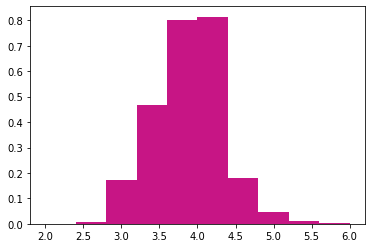

In [5]:
plt.hist(
    df["interest_rate"], 
    color='mediumvioletred', 
    range = (2,6), 
    density = True, 
    )

# CMD /  shortcut to uncomment line

px.histogram(df['borrower_credit_score'], 
             nbins=5, 
             color = df['m13'],
             x= "borrower_credit_score",
             #histnorm="probability density”
            )
px.histogram(df["debt_to_income_ratio"], log_y=True, nbins=20, color=df['m13'], marginal='box', barmode="group")

If you look closely you can see a tiny slither of purple at the base of the bars. 
The area of this purple is proportional to the number of people in our dataset that defaulted.
This should give more of an idea of how imbalanced this dataset is in terms of how many examples have each label!



>  Majority of the loans have interest rates between 3-5 %

If you click the label 0 on the right, you will just see defaulters i.e label 1  distribution. We can clearly see some of the users have `borrower_credit_score` < 500.

> One clear indication is, there are high chances of __default__ is `borrower_credit_score` is <= 500 . 

THe __non-defaulters__ are pretty uniformaly distributed while the __defaulters__ are heavily skewed towards the left.

Take a look at the split of different labels in the dataset to check how likely the different labels are.

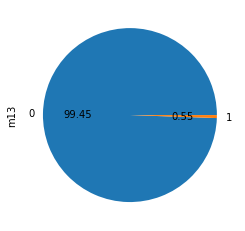

In [6]:
df['m13'].value_counts().plot.pie(autopct="%.2f") #vaule_counts: returns a series containing counts of unique values
#in terms of accuracy, 99.45% of the time, model is accurate just by guessing 'defaulted', 
#so not useful for AI training, 
#therefore use different success evaluation other than accuracy

You can see a clear ___target data imbalance___ using this visualisation. This will be critical to account for later.
### Visualisation of Continuous Variables

Lets start with plotting scatter plot for some of the columns that you want. 

#### Scatter Plots

In [7]:
px.scatter(
    df, #see documentation- first argument is data frame, sometimes positional arguments important
    x='debt_to_income_ratio',
    y='unpaid_principal_bal',
    color=df['m13'], #kina like a third dimension
    labels=['defaulted','did not default'],

)

There is nothing significant we can notice here , we can notice how `unpaid_principal_bal` is consistent for different `debt_to_income_ratio`'s.

In [8]:
# rows_which_contain_defaulters= df['m13'] ==1 #method 1- create new data frame
# defaulters=df[rows_which_contain_defaulters]

# px.scatter(
#     defaulters,
#     x='borrower_credit_score',
#     y='unpaid_principal_bal',
#     #color=df['m13'], #don't need it
#     #labels=['defaulted','did not default'],

# )


px.scatter(           #method 2 all in one
    df[df['m13'] ==1],
    x='borrower_credit_score',
    y='unpaid_principal_bal',
    #color=df['m13'], #don't need it
    labels=['defaulted','did not default'],

)

px.scatter(
    df[df['m13'] !=1],
    x='borrower_credit_score',
    y='unpaid_principal_bal',
    labels=['defaulted','did not default'],

)


if you notice closely, as the `unpaid_principal_bal` is increasing the credit score is also increasing. In other words
> people with high `credit_score` have more `unpaid_principal_bal`.

which makes sense because more credit score means more trust of financial system w.r.t timely payments.

There is a lot of things that we can draw here. Please feel free to go crazy and try visualise the relationship of every column with every other columns.

### Outliers

__What are Outliers__

Outliers are data points which are different from the rest of the data. ex - if we consider a group of students, someone with a height of 7'5" would be considered as an outlier. 

__Why should we worry about them ?__ 

Outliers deviate us from the general trend of the data. They can affect some machine learning algorithms negetively. Hence, we want to handle them. 

You can see how this line is pushed away from the general trend of the data because of outliers.

[<img src="https://developer-blogs.nvidia.com/wp-content/uploads/2022/07/huber-regression.png">](http://google.com.au/)


__Dealing with Outliers__

There are different approaches you can take to dealing with outliers:
- We can choose to remove outliers in some of the columns.
- We can try and impute the outliers by capping them to upper and lower limits of a boxplot. 
- We can choose ML algorithms which are robust to outliers. 
    - Usually, gradient boosting models like `xgboost` or `lightgbm` work pretty well with all kinds of datasets and are robust to outliers. Some models like `catboost` are even robust to missing values.

#### Boxplots

A __boxplot__ can be used to detect the outliers in the data. 
It shows a box-like shape with "whiskers" coming out of either end.
We typically classify examples as outliers if they lie outside the whiskers.

You can read more about boxplots [here](https://www.simplypsychology.org/boxplots.html#:~:text=The%20interquartile%20range%20(IQR)%20is,(e.g.%20Q3%E2%88%92Q1).)

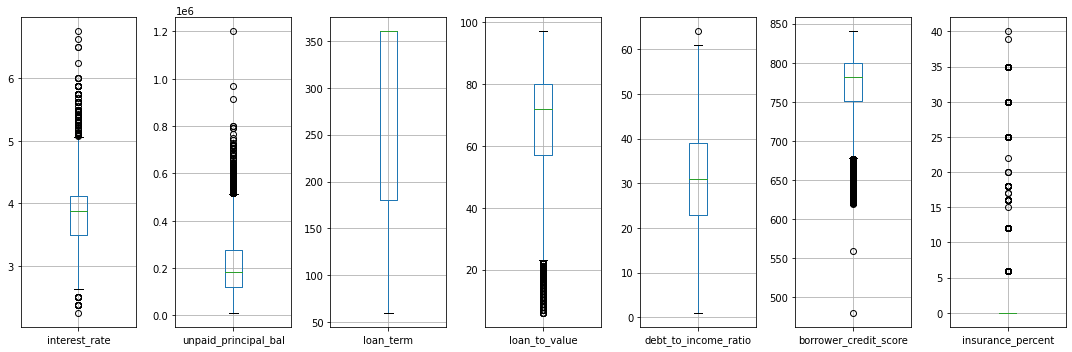

In [9]:
f, ax = plt.subplots(nrows=1, ncols=7, figsize=(15,5))
axx = ax.flatten() #comes out like a list instead of rows and columns
# i = 0
# for col in continuous_columns: #for loop over all continous columns
#   df[[col]].boxplot(ax = axx[i])
#   print(i,col)
#   i += 1

for idx, col in enumerate(continuous_columns):
  df[[col]].boxplot(ax=axx[idx]) #same thing as part above
  
plt.tight_layout()
plt.show()
interest_rate_mean = df["interest_rate"].mean()
interest_rate_std = df["interest_rate"].std()
upper_limit = interest_rate_mean + interest_rate_std*2
lower_limit = interest_rate_mean - interest_rate_std*2

new_df=df[(df["interest_rate"]<upper_limit) & (df["interest_rate"]>lower_limit)]
#new_values = lambda x: True if lower_limit<df['interest_rate']<upper_limit else None #no
#print(type(new_values(df["interest_rate"]))) #so no need

In [10]:
#df[(df["interest_rate"]<upper_limit) & (df["interest_rate"]>lower_limit)]

In the above plot, you will notice most of the columns have outliers. For now, we will use algorithms which are robust to outliers and ignore them. 

> At this point, you should have an idea on how to perform EDA by visualising your data, computing some statistics, and trying to draw interpretations from that.

## Key Takeaways
- Continuous and categorical variables need to be treated differently
- `pandas` and `matplotlib` are essential visualisation libraries for Python
- Distributions help you to understand how the data is spread out
- Scatter plots can be used to visualise trends in the data
- Outliers are datapoints far different to the rest
- Boxplots can be used to identify outliers
